In [1]:
import numpy as np
import pandas as pd
import regex as re
import os

In [2]:
df = pd.read_csv(r"C:\Users\Crypto.gunner\Desktop\CODING\DevelHope\Progetto_APP\develhope_2023_team2\progetto_2\googleplaystore.csv")

In [3]:
df.shape

(10841, 13)

In [4]:
df

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53M,"5,000+",Free,0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6M,100+,Free,0,Everyone,Education,"July 6, 2018",1.0,4.1 and up
10838,Parkinson Exercices FR,MEDICAL,NaN,3,9.5M,"1,000+",Free,0,Everyone,Medical,"January 20, 2017",1.0,2.2 and up
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,Varies with device,"1,000+",Free,0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device


In [5]:
df['Category'].unique()

array(['ART_AND_DESIGN', 'AUTO_AND_VEHICLES', 'BEAUTY',
       'BOOKS_AND_REFERENCE', 'BUSINESS', 'COMICS', 'COMMUNICATION',
       'DATING', 'EDUCATION', 'ENTERTAINMENT', 'EVENTS', 'FINANCE',
       'FOOD_AND_DRINK', 'HEALTH_AND_FITNESS', 'HOUSE_AND_HOME',
       'LIBRARIES_AND_DEMO', 'LIFESTYLE', 'GAME', 'FAMILY', 'MEDICAL',
       'SOCIAL', 'SHOPPING', 'PHOTOGRAPHY', 'SPORTS', 'TRAVEL_AND_LOCAL',
       'TOOLS', 'PERSONALIZATION', 'PRODUCTIVITY', 'PARENTING', 'WEATHER',
       'VIDEO_PLAYERS', 'NEWS_AND_MAGAZINES', 'MAPS_AND_NAVIGATION',
       '1.9'], dtype=object)

# 1 Data manipulation

## 1.1 Drop the weird row

In [6]:
df = df[df['App'] != 'Life Made WI-Fi Touchscreen Photo Frame']

In [7]:
df.shape

(10840, 13)

## 1.1 Drop nan and useless columns and rows 

In [8]:
df = df.dropna()

In [9]:
df.shape

(9360, 13)

In [10]:
df['Last Updated'] = pd.to_datetime(df['Last Updated'])

In [11]:
df['Last Updated']

0       2018-01-07
1       2018-01-15
2       2018-08-01
3       2018-06-08
4       2018-06-20
           ...    
10834   2017-06-18
10836   2017-07-25
10837   2018-07-06
10839   2015-01-19
10840   2018-07-25
Name: Last Updated, Length: 9360, dtype: datetime64[ns]

In [12]:
df = df.loc[df.groupby('App')['Last Updated'].idxmax()]

In [13]:
df.shape

(8190, 13)

## 1.2 Rating

### 1.2.1 Covert Rating values to float

In [14]:
df['Rating'].dtype

dtype('float64')

## 1.2 Reviews

### 1.2.1 Convert Reviews values to int

In [15]:
df['Reviews'] = df['Reviews'].astype('int32')
df['Reviews']

8532    40467
324       115
4541      259
4636      573
5940       27
        ...  
6420      190
4362      718
2575    22098
7559       19
882     11661
Name: Reviews, Length: 8190, dtype: int32

## 1.3 Size

#### 1.3.1 Remove string elements and convert to bytes

In [16]:
values = df['Size']

def size(value):
    
    match = re.match(r'(\d+)([Mk]?)', value)            #use match method from regex module to look for integer or decimal number r'(\d+)
                                                        #and add ([Mk]?) to look for characters in strings of for loop in df['Size]
    if not match:
        return None                                        
    
    amount, unit = match.groups()                       #assegno amount e unit ai 2 gruppi definiti sopra usando il metodo groups
    amount = float(amount)                              #converto amount in float
    
    if unit == '':                                      #inizio a cercare attraverso i loop se i valori sono in kylobytes, megabytes e li converto in bytes
        return amount
    elif unit == 'k':
        return amount * 1024
    elif unit == 'M':
        return amount * 1024 * 1024
    else:
        return None

df['Size'] = values.apply(size)                         

#### 1.3.2 Assing mean of size value grouped by category to missing values left

In [17]:
#ora che ho tolto i valori 'varies with device'
#creo funzione per sostiuire quei valori con la medie size dopo groupby per category

def avg_val(group_column, value_column):                

    mean_by_group = df.groupby(group_column)[value_column].mean()

    df['Size'] = df.groupby(group_column)[value_column].apply(lambda x: x.fillna(x.mean()))
    return df                                           #assegno ai  valori na di size la media dei valori conosciuti usando il groupby
                                                        #uso la funzione lambda per "riempire i buchi" nei dati mancanti con la media dei valori che ho
avg_val('Category', 'Size')                             #chiamo la funzione usando 2 parametri: category per groupby e size per i valori a cui applicare la media

print(df['Size'])

8532    23068672.0
324            9.0
4541      207872.0
4636    55574528.0
5940    14680064.0
           ...    
6420    35651584.0
4362    27262976.0
2575    18874368.0
7559           3.0
882            4.0
Name: Size, Length: 8190, dtype: float64


In [18]:
#Faccio la prova che ora ho tutti valori float nella mia colonna size
df['Size'].describe()

count    8.190000e+03
mean     2.034581e+07
std      2.380953e+07
min      1.000000e+00
25%      6.000000e+00
50%      1.425653e+07
75%      2.936013e+07
max      1.048576e+08
Name: Size, dtype: float64

## 1.4 Installs

In [19]:
df['Installs']

8532    1,000,000+
324        10,000+
4541       10,000+
4636       10,000+
5940          100+
           ...    
6420       10,000+
4362       10,000+
2575    1,000,000+
7559       10,000+
882     1,000,000+
Name: Installs, Length: 8190, dtype: object

In [20]:
def installs(values):
    
    df['Installs'] = df['Installs'].astype('str').str.extractall('(\d+)').unstack().fillna('').sum(axis=1).astype(int)
    return df['Installs']

df['Installs'] = installs(df['Installs'])
df['Installs']

8532    1000000
324       10000
4541      10000
4636      10000
5940        100
         ...   
6420      10000
4362      10000
2575    1000000
7559      10000
882     1000000
Name: Installs, Length: 8190, dtype: int32

In [21]:
df['Installs']

8532    1000000
324       10000
4541      10000
4636      10000
5940        100
         ...   
6420      10000
4362      10000
2575    1000000
7559      10000
882     1000000
Name: Installs, Length: 8190, dtype: int32

## 1.5 Price

In [22]:
df['Price'].isnull().values.any()

False

In [23]:
df['Price']

8532          0
324           0
4541          0
4636          0
5940          0
         ...   
6420          0
4362    $399.99
2575          0
7559          0
882           0
Name: Price, Length: 8190, dtype: object

In [24]:
df['Price'].unique()

array(['0', '$1.49', '$0.99', '$3.08', '$16.99', '$9.99', '$33.99',
       '$3.04', '$8.99', '$1.99', '$2.49', '$4.99', '$2.99', '$7.99',
       '$29.99', '$3.99', '$6.49', '$1.29', '$4.49', '$14.99', '$1.50',
       '$3.90', '$1.75', '$5.99', '$2.00', '$3.49', '$11.99', '$2.59',
       '$14.00', '$10.99', '$6.99', '$3.95', '$12.99', '$7.49', '$19.99',
       '$3.28', '$4.77', '$13.99', '$3.88', '$8.49', '$24.99', '$399.99',
       '$389.99', '$37.99', '$18.99', '$379.99', '$299.99', '$400.00',
       '$15.46', '$39.99', '$1.61', '$1.59', '$9.00', '$15.99', '$1.70',
       '$3.02', '$4.60', '$1.00', '$10.00', '$5.49', '$1.76', '$4.84',
       '$4.59', '$2.95', '$17.99', '$1.97', '$79.99', '$2.90', '$2.56',
       '$2.50', '$19.40', '$4.29', '$1.20'], dtype=object)

### 1.5.1 Drop 'Everyone' row

In [25]:
print(np.where(df['Price'] == 'Everyone'))

(array([], dtype=int64),)


In [26]:
print(type(np.where(df['Price'] == 'Everyone')))

<class 'tuple'>


In [27]:
index_tuple = np.where(df['Price'] == 'Everyone')
for i in index_tuple:
    for index in i:
        print(index)

In [28]:
df['Price'].unique()

array(['0', '$1.49', '$0.99', '$3.08', '$16.99', '$9.99', '$33.99',
       '$3.04', '$8.99', '$1.99', '$2.49', '$4.99', '$2.99', '$7.99',
       '$29.99', '$3.99', '$6.49', '$1.29', '$4.49', '$14.99', '$1.50',
       '$3.90', '$1.75', '$5.99', '$2.00', '$3.49', '$11.99', '$2.59',
       '$14.00', '$10.99', '$6.99', '$3.95', '$12.99', '$7.49', '$19.99',
       '$3.28', '$4.77', '$13.99', '$3.88', '$8.49', '$24.99', '$399.99',
       '$389.99', '$37.99', '$18.99', '$379.99', '$299.99', '$400.00',
       '$15.46', '$39.99', '$1.61', '$1.59', '$9.00', '$15.99', '$1.70',
       '$3.02', '$4.60', '$1.00', '$10.00', '$5.49', '$1.76', '$4.84',
       '$4.59', '$2.95', '$17.99', '$1.97', '$79.99', '$2.90', '$2.56',
       '$2.50', '$19.40', '$4.29', '$1.20'], dtype=object)

### 1.5.2 Remove dollar sign

In [29]:
def price(value):
    
    df['Price'] = np.array([value.replace('$', '') for value in df['Price']]).astype(float)
    return df['Price']


df['Price'] = price(df['Price'])

df['Price'].unique()

array([  0.  ,   1.49,   0.99,   3.08,  16.99,   9.99,  33.99,   3.04,
         8.99,   1.99,   2.49,   4.99,   2.99,   7.99,  29.99,   3.99,
         6.49,   1.29,   4.49,  14.99,   1.5 ,   3.9 ,   1.75,   5.99,
         2.  ,   3.49,  11.99,   2.59,  14.  ,  10.99,   6.99,   3.95,
        12.99,   7.49,  19.99,   3.28,   4.77,  13.99,   3.88,   8.49,
        24.99, 399.99, 389.99,  37.99,  18.99, 379.99, 299.99, 400.  ,
        15.46,  39.99,   1.61,   1.59,   9.  ,  15.99,   1.7 ,   3.02,
         4.6 ,   1.  ,  10.  ,   5.49,   1.76,   4.84,   4.59,   2.95,
        17.99,   1.97,  79.99,   2.9 ,   2.56,   2.5 ,  19.4 ,   4.29,
         1.2 ])

In [30]:
df['Price'].unique()

array([  0.  ,   1.49,   0.99,   3.08,  16.99,   9.99,  33.99,   3.04,
         8.99,   1.99,   2.49,   4.99,   2.99,   7.99,  29.99,   3.99,
         6.49,   1.29,   4.49,  14.99,   1.5 ,   3.9 ,   1.75,   5.99,
         2.  ,   3.49,  11.99,   2.59,  14.  ,  10.99,   6.99,   3.95,
        12.99,   7.49,  19.99,   3.28,   4.77,  13.99,   3.88,   8.49,
        24.99, 399.99, 389.99,  37.99,  18.99, 379.99, 299.99, 400.  ,
        15.46,  39.99,   1.61,   1.59,   9.  ,  15.99,   1.7 ,   3.02,
         4.6 ,   1.  ,  10.  ,   5.49,   1.76,   4.84,   4.59,   2.95,
        17.99,   1.97,  79.99,   2.9 ,   2.56,   2.5 ,  19.4 ,   4.29,
         1.2 ])

In [31]:
df

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
8532,+Download 4 Instagram Twitter,SOCIAL,4.5,40467,23068672.0,1000000,Free,0.00,Everyone,Social,2018-08-02,5.03,4.1 and up
324,- Free Comics - Comic Apps,COMICS,3.5,115,9.0,10000,Free,0.00,Mature 17+,Comics,2018-07-13,5.0.12,5.0 and up
4541,.R,TOOLS,4.5,259,207872.0,10000,Free,0.00,Everyone,Tools,2014-09-16,1.1.06,1.5 and up
4636,/u/app,COMMUNICATION,4.7,573,55574528.0,10000,Free,0.00,Mature 17+,Communication,2018-07-03,4.2.4,4.1 and up
5940,058.ba,NEWS_AND_MAGAZINES,4.4,27,14680064.0,100,Free,0.00,Everyone,News & Magazines,2018-07-06,1.0,4.2 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6420,감성학원 BL 첫사랑,COMICS,4.4,190,35651584.0,10000,Free,0.00,Everyone,Comics,2017-11-17,3.2.1,3.0 and up
4362,💎 I'm rich,LIFESTYLE,3.8,718,27262976.0,10000,Paid,399.99,Everyone,Lifestyle,2018-03-11,1.0.0,4.4 and up
2575,"💘 WhatsLov: Smileys of love, stickers and GIF",SOCIAL,4.6,22098,18874368.0,1000000,Free,0.00,Everyone,Social,2018-07-24,4.2.4,4.0.3 and up
7559,📏 Smart Ruler ↔️ cm/inch measuring for homework!,TOOLS,4.0,19,3.0,10000,Free,0.00,Everyone,Tools,2017-10-21,1.0,4.2 and up


### 1.6 Graphs

#### 1.6.1 Category count barplot

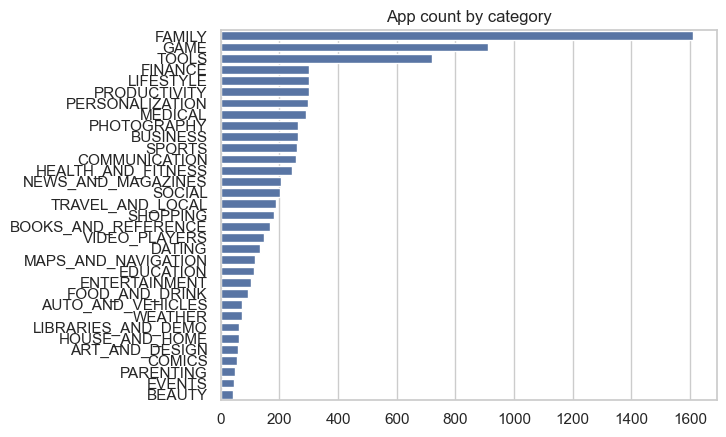

In [32]:
import seaborn as sns
import matplotlib.pyplot as plt
app_counts = df['Category'].value_counts()
sns.set_theme(style='whitegrid')
sns.barplot(y=app_counts.index, x=app_counts.values, color='b')
plt.title('App count by category')
plt.show()

#### 1.6.2 Average rating by category

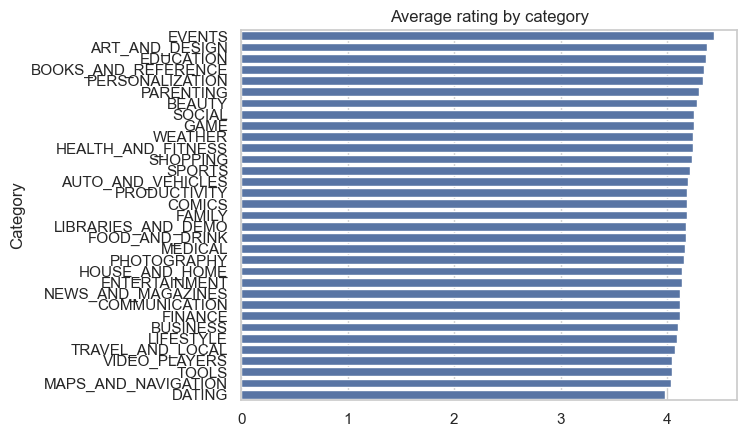

In [33]:
group_rating = df.groupby(['Category']).mean()['Rating']
val = group_rating.sort_values(ascending=False)
sns.barplot(y=val.index, x=val.values, color='b')
plt.title('Average rating by category')
plt.show()

#### 1.6.3 Number of installations by category app

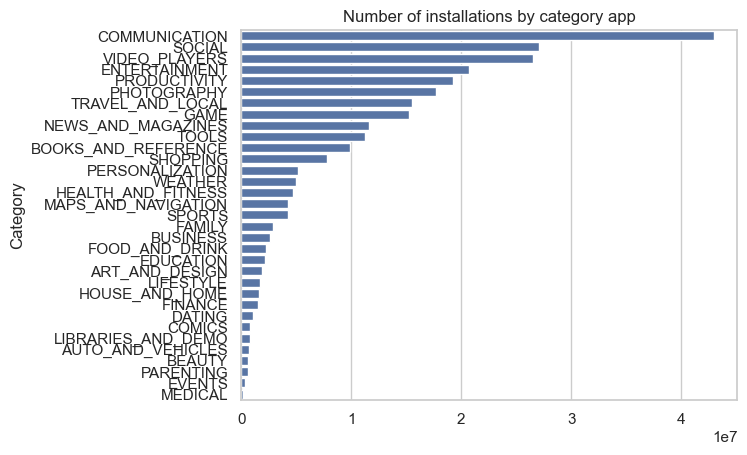

In [34]:
group_installs = df.groupby(['Category']).mean()['Installs']
vals = group_installs.sort_values(ascending=False)
sns.barplot(x=vals.values, y=vals.index, color='b')
plt.title('Number of installations by category app')
plt.show()

#### 1.6.4 Average number of reviews by category

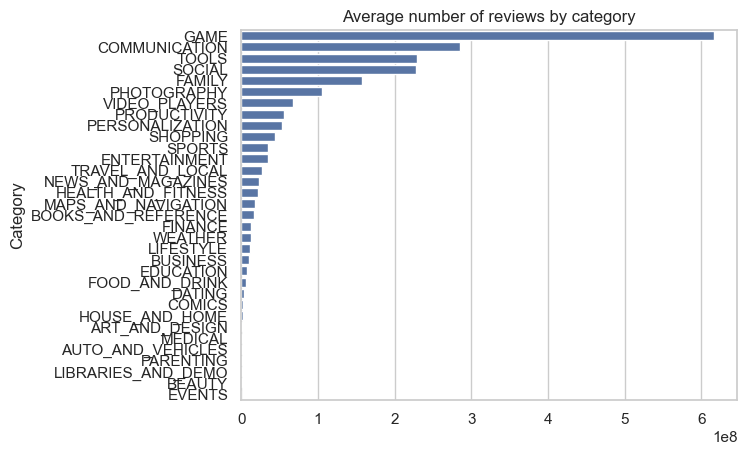

In [35]:
group_reviews = df.groupby(['Category']).sum()['Reviews']
vals1 = group_reviews.sort_values(ascending=False)
sns.barplot(x=vals1.values, y=vals1.index, color='b')
plt.title('Average number of reviews by category')
plt.show()

#### 1.6.5 Number of apps by content rating

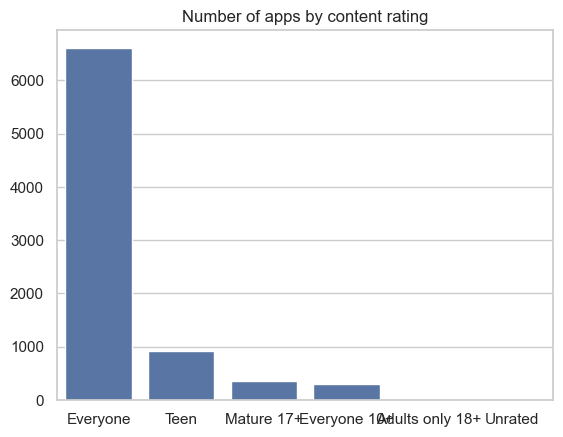

In [36]:
vals2 = df['Content Rating'].value_counts()
sns.barplot(y=vals2.values, x=vals2.index, color='b')
plt.title('Number of apps by content rating')
plt.show()

#### 1.6.6 5 Paid apps by category

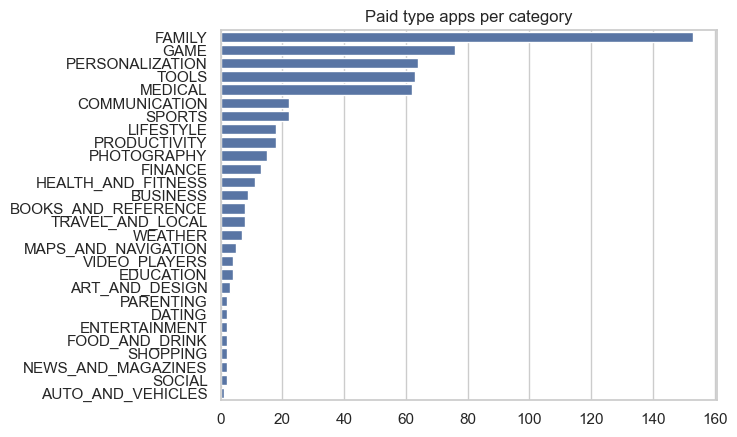

In [37]:
query1 = df.query('Type=="Paid"')
vals = query1['Category'].value_counts()
sns.barplot(x=vals.values, y=vals.index, color='b')
plt.title('Paid type apps per category')
plt.show()

#### 1.6.7 Best Apps

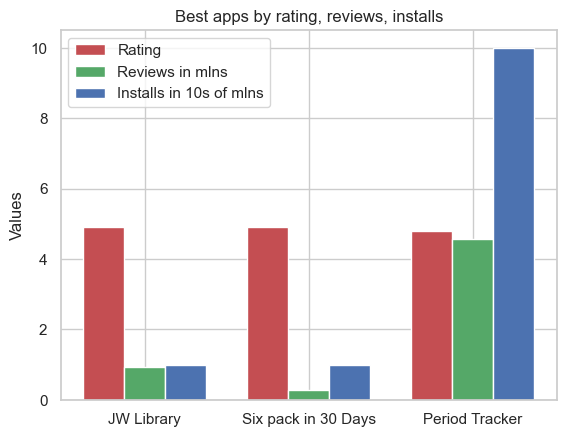

In [38]:
query = df.query('Rating>=4.8 & Reviews>100000 & Installs>1000000')
apps = query.sort_values(by=['Rating', 'Reviews'], ascending=False)
new_df = apps.filter(items=['App', 'Category', 'Rating', 'Reviews', 'Installs', 'Size'])

new_df.loc[(new_df.index[1]), 'App'] = 'Six pack in 30 Days'
new_df.loc[(new_df.index[2]), 'App'] = 'Period Tracker'
apps = new_df.head(3)

app1 = new_df.loc[(new_df.index[0]), 'App']
app2 = new_df.loc[(new_df.index[1]), 'App']
app3 = new_df.loc[(new_df.index[2]), 'App']


N = 3
ind = np.arange(N)
width = 0.25

xvals = apps['Rating']
bar1 = plt.bar(ind, xvals, width, color = 'r')

yvals = apps['Reviews']/10**6
bar2 = plt.bar(ind+width, yvals, width, color='g')

zvals = apps['Installs']/10**7
bar3 = plt.bar(ind+width*2, zvals, width, color = 'b')


plt.ylabel('Values')
plt.title("Best apps by rating, reviews, installs")

plt.xticks(ind+width,[app1, app2, app3])
plt.legend( (bar1, bar2, bar3), ('Rating', 'Reviews in mlns', 'Installs in 10s of mlns'))
plt.show()

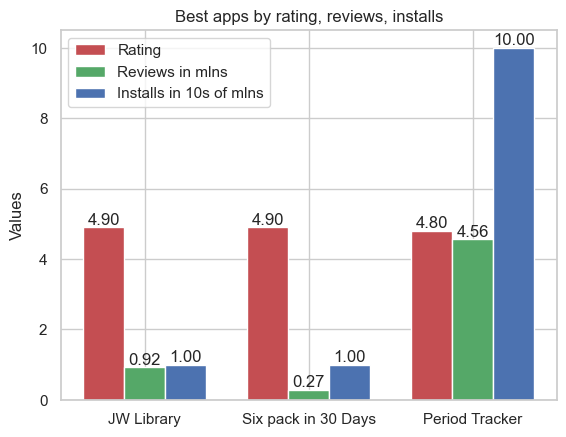

In [45]:
N = 3
ind = np.arange(N)
width = 0.25

xvals = apps['Rating']
bar1 = plt.bar(ind, xvals, width, color = 'r')

yvals = apps['Reviews']/10**6
bar2 = plt.bar(ind+width, yvals, width, color='g')

zvals = apps['Installs']/10**7
bar3 = plt.bar(ind+width*2, zvals, width, color = 'b')

plt.ylabel('Values')
plt.title("Best apps by rating, reviews, installs")

plt.xticks(ind+width,[app1, app2, app3])
plt.legend( (bar1, bar2, bar3), ('Rating', 'Reviews in mlns', 'Installs in 10s of mlns'))


#Add labels to the top of each bar
for bar in [bar1, bar2, bar3]:
    for rect in bar:
        height = rect.get_height()
        plt.text(rect.get_x() + rect.get_width()/2.0, height, '%.2f' % height, ha='center', va='bottom')


plt.show()

## 2 Click-up plotting tasks

#### 2.1 print(table) the unique names of all categories

In [40]:
df['Category'].unique()

array(['SOCIAL', 'COMICS', 'TOOLS', 'COMMUNICATION', 'NEWS_AND_MAGAZINES',
       'SPORTS', 'HEALTH_AND_FITNESS', 'FAMILY', 'BOOKS_AND_REFERENCE',
       'LIFESTYLE', 'BUSINESS', 'SHOPPING', 'MEDICAL', 'GAME',
       'PERSONALIZATION', 'PHOTOGRAPHY', 'TRAVEL_AND_LOCAL', 'DATING',
       'PRODUCTIVITY', 'ART_AND_DESIGN', 'FOOD_AND_DRINK',
       'VIDEO_PLAYERS', 'HOUSE_AND_HOME', 'MAPS_AND_NAVIGATION',
       'ENTERTAINMENT', 'FINANCE', 'EDUCATION', 'AUTO_AND_VEHICLES',
       'WEATHER', 'BEAUTY', 'EVENTS', 'LIBRARIES_AND_DEMO', 'PARENTING'],
      dtype=object)

#### 2.2 Plot a bar chart for categories with the total number of installing numbers in each category 

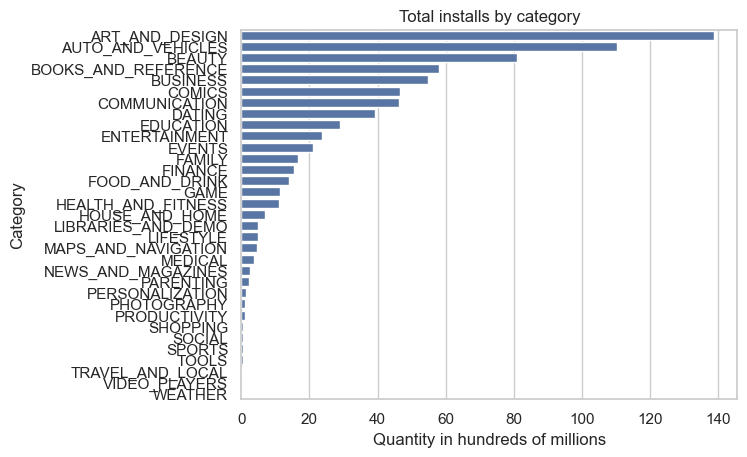

In [41]:
import seaborn 
group = df.groupby('Category')
values = group['Installs'].sum()
sort_vals = values.sort_values(ascending=False)
vals = ((sort_vals.values)/(10**8))
sns.barplot(x=vals, y=values.index, color='b')
plt.xlabel('Quantity in hundreds of millions')
plt.title('Total installs by category')
plt.show()

#### 2.3 plot a bar chart for the total prices of each paid app in each category ( the sum of all prices in the same category)

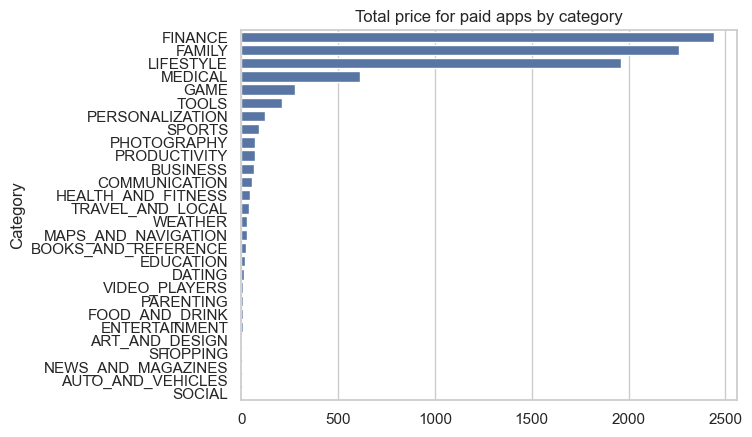

In [42]:
query = df.query('Price>0')
vals = query.groupby(by='Category')
price = vals['Price'].sum().sort_values(ascending=False)
sns.barplot(y=price.index, x=price.values, color='b')
plt.title('Total price for paid apps by category')
plt.show()

#### 2.4 Plot a bar chart of the total revenue of each category by multiplying the price by the number of installs

In [43]:
# Prova per vedere se è corretto
new_df = df[df['Category']=='FAMILY']
query = new_df.query('Price>0')
(query['Price']*query['Installs']).sum().round(1)

113624306.7

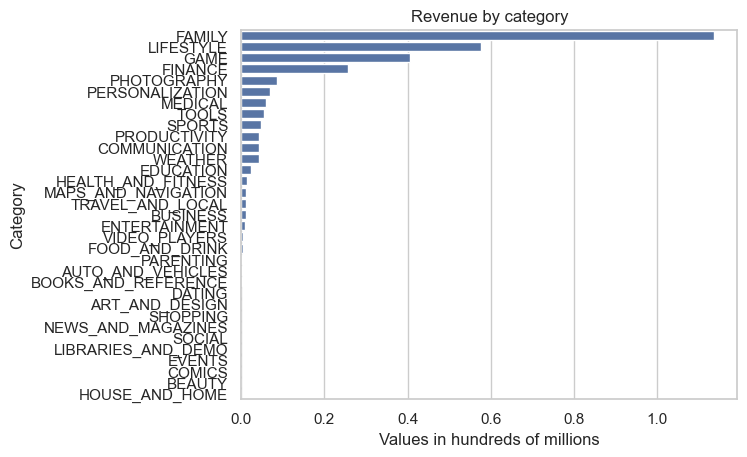

In [44]:
df['Revenue'] = df['Price']*df['Installs']
new_df = df.groupby('Category').sum()
total_revenue = new_df['Revenue'].sort_values(ascending=False)
values = total_revenue.values/10**8
sns.barplot(x=values, y=total_revenue.index, color='b')
plt.title('Revenue by category')
plt.xlabel('Values in hundreds of millions')
plt.show()